# Imports

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-10-04 12:33:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.92MB/s    in 0.7s    

2022-10-04 12:33:42 (1.92 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [266]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [267]:
print(df.shape)

(20640, 10)


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

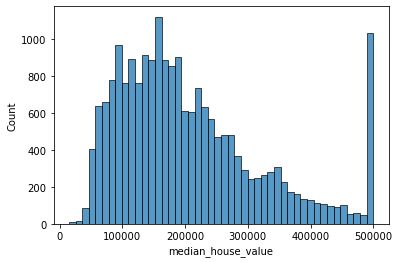

In [10]:
sns.histplot(df.median_house_value)

It has a bit a longtail at the right side

/home/giorgos/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

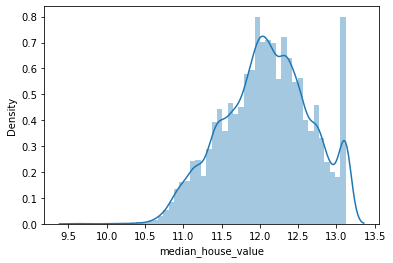

In [265]:
log_median_hv = np.log1p(df.median_house_value)

sns.distplot(log_median_hv, bins = 50)

now it seems better, will increase our model accuracy

Select columns that we need, based on instructions

In [172]:
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

/tmp/ipykernel_262131/1636074443.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins = 100, ax = ax, layout = (3, 3), column = columns)


<function matplotlib.pyplot.show(close=None, block=None)>

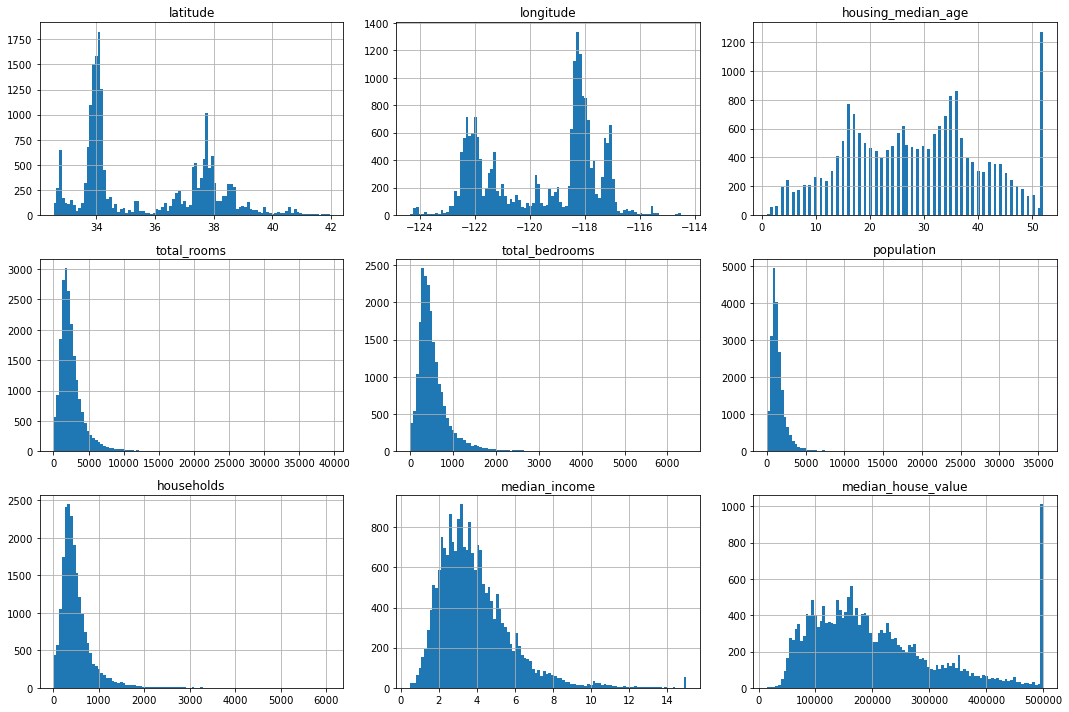

In [252]:
# INSPECTING HISTOGRAMS

fig = plt.figure(figsize = (15, 10))
ax = plt.gca()

df.hist(bins = 100, ax = ax, layout = (3, 3), column = columns)

plt.tight_layout()
plt.show

In [173]:
df = df[columns]
df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Dataframe information

In [262]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [263]:
df.isna().any() # check whether it has any NaNs

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [264]:
df.describe(percentiles = [.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


only total bedrooms has NaN's (207)

<AxesSubplot:>

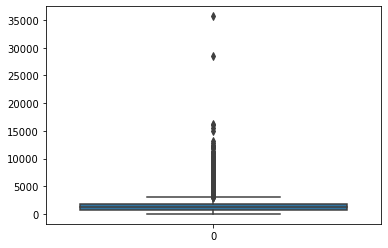

In [19]:
sns.boxplot(data = df.population)

Median 50% percentile for population

In [77]:
df.population.median()

1166.0

# Split the dataset


- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [203]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [270]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

Drop the target variable, i.e. the median house price and store it elsewhere! Apply transform to get rid of the tail!

In [271]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [275]:
df_shuffled.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Dealing with NaN's 


- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


In [372]:
# Create the two options
 #if 0 then fill with zeros the NaNs if 1, use mean of the variable

check =  ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
        'population','households','median_income']


# If fillna_value 0 then fill with zeros, if 1 then fill with mean
def prepare_X(df, fillna_value):
    
    df = df.copy()
    
    df_num = df[check]
    
    nans = df_num.isnull().sum().sum()
    # Are there NaN's?
    
    if nans == 0:
        print('There are no NaN values')
    
    else:
        # nans when >0 or replace with a pct, mby drop those that are lower
        nan_columns = [df_num.isnull().sum()[df_num.isnull().sum()>0].index[0]]
        if fillna_value == 0:
            for col in nan_columns:

                df_num[col] = df_num[col].fillna(0)

        elif fillna_value == 1:
            for col in nan_columns:
                mean = df_num[col].mean()
                df_num[col] = df_num[col].fillna(mean)

        else:
            raise ValueError('Invalid fillna_value, use 0 for zeros, or 1 for mean')
        
    X = df_num.values
        
    return X

In [306]:
nan_columns = [df_shuffled.isnull().sum()[df_shuffled.isnull().sum()>0].index[0]] 
# see the columns that have NaNs
nan_columns

['total_bedrooms']

# Model training & validation on validation set with RMSE

In [299]:
def train_linear_regression_reg(X, y, r = 0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 
    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # which is a tuple
    
    return w_full[0], w_full[1:] # return 1st element of the tuple (bias) and the weights

def rmse(y, y_pred):
    
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Option one: zero

In [315]:
X_train_zero = prepare_X(df_train, fillna_value = 0)
X_val_zero = prepare_X(df_val, fillna_value = 0)

There are no NaN values


In [316]:
X_train_zero

array([[ 3.6060e+01, -1.1901e+02,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [ 3.5140e+01, -1.1946e+02,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [ 3.7800e+01, -1.2244e+02,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [ 3.8980e+01, -1.2091e+02,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [ 3.4090e+01, -1.1772e+02,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [ 3.7760e+01, -1.2247e+02,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [317]:
w0, w = train_linear_regression_reg(X_train_zero, y_train, r = 0)

w0, w

(-11.686975241610247,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [318]:
#Then validate on X_val
y_pred = w0 + X_val_zero.dot(w)

score = rmse(y_val, y_pred)
score
#round(score, 2)

0.3295330365227534

In [319]:
## Option 2: mean

X_train_mean = prepare_X(df_train, fillna_value = 1)
X_val_mean = prepare_X(df_val, fillna_value = 1)

w0, w = train_linear_regression_reg(X_train_mean, y_train, r = 0)

w0, w

There are no NaN values


(-11.759590872447781,
 array([-2.82182103e-01, -2.76809637e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [320]:
#Then validate on X_val
y_pred = w0 + X_val_mean.dot(w)

score = rmse(y_val, y_pred)

score
#round(score, 2)

0.3290195439006839

-  0.33 when adding zeros to NaNs
-  0.33 when adding mean to NaNs

So both are equally good !

# Regularization 

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?


In [323]:
X_train = prepare_X(df_train, fillna_value = 0)
X_val = prepare_X(df_val, fillna_value = 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, round(score, 2))

There are no NaN values
0 0.33
1e-06 0.33
0.0001 0.33
0.001 0.33
0.01 0.33
0.1 0.33
1 0.33
5 0.34
10 0.34


There are multpiple options for r, so we will go with the smallest one r = 0

# Effect of the selected seed ?


- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


In [329]:
scores_sd = []
for sd in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(sd)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Train the model
    X_train = prepare_X(df_train, fillna_value = 0)
    X_val = prepare_X(df_val, fillna_value = 0)


    w0, w = train_linear_regression_reg(X_train, y_train, r = 0)
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    scores_sd.append(score)

    #print(sd, round(score, 2))    

/tmp/ipykernel_262131/3969715192.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].copy().fillna(0).copy()
/tmp/ipykernel_262131/3969715192.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col] = df_num[col].copy().fillna(0).copy()
/tmp/ipykernel_262131/3969715192.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [348]:
[round(score, 2) for score in scores_sd]

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [349]:
std = np.std(scores_sd)

np.round(std, 3)

0.004

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

# Final evaluation 

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?


In [342]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [371]:
# Train the model

df_full_train = pd.concat([df_train, df_val]) # combine val + train datasets

df_full_train = df_full_train.reset_index(drop  = True) # reset indices to be sequential

X_full_train = prepare_X(df_full_train, fillna_value = 0)
X_test = prepare_X(df_test, fillna_value = 0)

y_full_train = np.concatenate([y_train, y_val]) # add target for val + training


w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)

round(score, 2)

/tmp/ipykernel_262131/4006293706.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col].iloc[:] = df_num[col].iloc[:].fillna(0)
/tmp/ipykernel_262131/4006293706.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col].iloc[:] = df_num[col].iloc[:].fillna(0)


0.35